In [7]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
pd.options.display.float_format = "{:.4f}".format
pd.set_option("display.max_rows", None, "display.max_columns", None)

Automatically created module for IPython interactive environment


In [8]:
path = r'/Users/wenxuanhuang/Documents/Repo/ML-for-COVID-19-dataset/result_log/08311740_EQODS_NF(200,10)_DIV0.15'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df = concatenated_df.rename(columns={"# x_axis": "axis", " ur_accuracies": "ur_accuracies", " ur_fairness": "ur_fairness", " rs_accuracies": "rs_accuracies", " rs_fairness": "rs_fairness", " nonal_accuracies": "nonal_accuracies", " nonal_fairness": "nonal_fairness"})

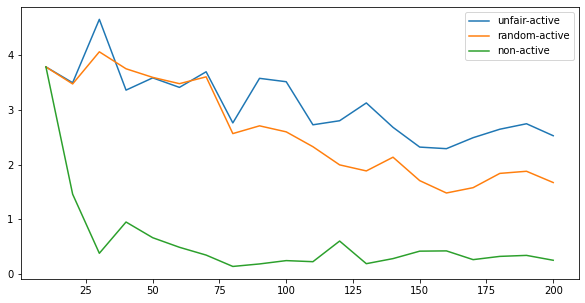

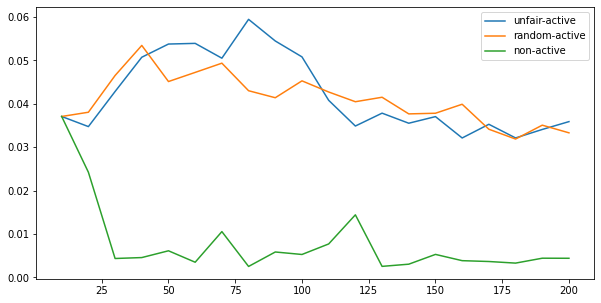

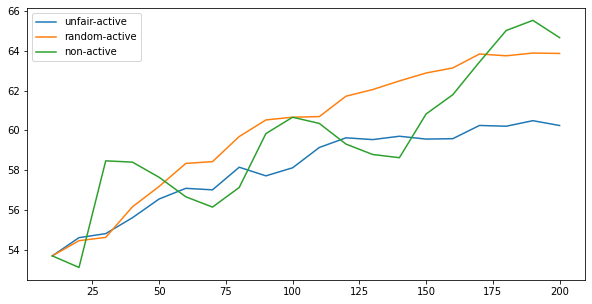

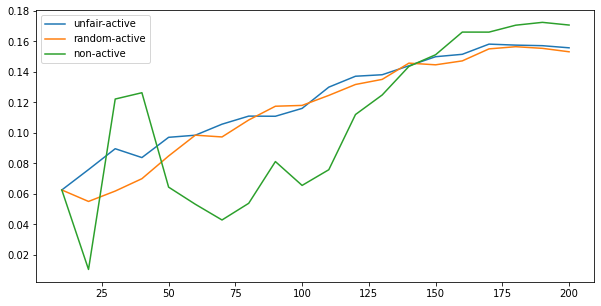

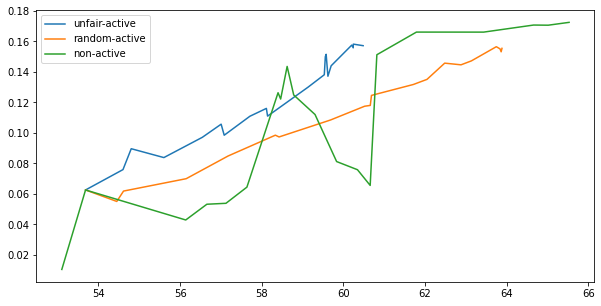

In [9]:
# print(concatenated_df)
budget = []
ur_a_std = []
ur_f_std = []
rs_a_std = []
rs_f_std = []
nonal_a_std = []
nonal_f_std = []
ur_a_mean = []
ur_f_mean = []
rs_a_mean = []
rs_f_mean = []
nonal_a_mean = []
nonal_f_mean = []

for i in pd.unique(concatenated_df['axis']):
    
    df_per_budget = concatenated_df[(concatenated_df['axis'] == i)].copy()
    stdev = (df_per_budget.loc[:, df_per_budget.columns != 'axis'].std(axis = 0))
    mean = (df_per_budget.loc[:, df_per_budget.columns != 'axis'].mean(axis = 0))

    budget = np.append(budget, i)

    ur_a_std = np.append(ur_a_std, stdev['ur_accuracies'])
    ur_f_std = np.append(ur_f_std, stdev['ur_fairness'])
    rs_a_std = np.append(rs_a_std, stdev['rs_accuracies'])
    rs_f_std = np.append(rs_f_std, stdev['rs_fairness'])
    nonal_a_std = np.append(nonal_a_std, stdev['nonal_accuracies'])
    nonal_f_std = np.append(nonal_f_std, stdev['nonal_fairness'])

    ur_a_mean = np.append(ur_a_mean, mean['ur_accuracies'])
    ur_f_mean = np.append(ur_f_mean, mean['ur_fairness'])
    rs_a_mean = np.append(rs_a_mean, mean['rs_accuracies'])
    rs_f_mean = np.append(rs_f_mean, mean['rs_fairness'])
    nonal_a_mean = np.append(nonal_a_mean, mean['nonal_accuracies'])
    nonal_f_mean = np.append(nonal_f_mean, mean['nonal_fairness'])

fig = plt.figure(figsize=(10,5))
plt.plot(budget, ur_a_std, label='unfair-active')
plt.plot(budget, rs_a_std, label='random-active')
plt.plot(budget, nonal_a_std, label='non-active')
plt.legend()
plt.savefig("result_log/a_std.png", bbox_inches='tight', dpi=200)
plt.show()

fig = plt.figure(figsize=(10,5))
plt.plot(budget, ur_f_std, label='unfair-active')
plt.plot(budget, rs_f_std, label='random-active')
plt.plot(budget, nonal_f_std, label='non-active')
plt.legend()
plt.savefig("result_log/f_std.png", bbox_inches='tight', dpi=200)
plt.show()

fig = plt.figure(figsize=(10,5))
plt.plot(budget, ur_a_mean, label='unfair-active')
plt.plot(budget, rs_a_mean, label='random-active')
plt.plot(budget, nonal_a_mean, label='non-active')
plt.legend()
plt.savefig("result_log/a_avg.png", bbox_inches='tight', dpi=200)
plt.show()

fig = plt.figure(figsize=(10,5))
plt.plot(budget, ur_f_mean, label='unfair-active')
plt.plot(budget, rs_f_mean, label='random-active')
plt.plot(budget, nonal_f_mean, label='non-active')
plt.legend()
plt.savefig("result_log/f_avg.png", bbox_inches='tight', dpi=200)
plt.show()

ur_index = np.argsort(ur_a_mean)
rs_index = np.argsort(rs_a_mean)
nonal_index = np.argsort(nonal_a_mean) 

fig = plt.figure(figsize=(10,5))
plt.plot(ur_a_mean[ur_index], ur_f_mean[ur_index], label='unfair-active')
plt.plot(rs_a_mean[rs_index], rs_f_mean[rs_index], label='random-active')
plt.plot(nonal_a_mean[nonal_index], nonal_f_mean[nonal_index], label='non-active')
plt.legend()
plt.savefig("result_log/af_avg.png", bbox_inches='tight', dpi=200)
plt.show()